In [1]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("forestfires.csv")
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
df.shape

(517, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
df['month'].unique(),df['month'].value_counts()

(array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
        'dec', 'may', 'nov'], dtype=object),
 aug    184
 sep    172
 mar     54
 jul     32
 feb     20
 jun     17
 oct     15
 apr      9
 dec      9
 jan      2
 may      2
 nov      1
 Name: month, dtype: int64)

In [7]:
df['day'].unique(),df['day'].value_counts()

(array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object),
 sun    95
 fri    85
 sat    84
 mon    74
 tue    64
 thu    61
 wed    54
 Name: day, dtype: int64)

In [8]:
df['size_category'].unique(),df['size_category'].value_counts()

(array(['small', 'large'], dtype=object),
 small    378
 large    139
 Name: size_category, dtype: int64)

In [9]:
label_encoder=preprocessing.LabelEncoder()
df['size_category']=label_encoder.fit_transform(df['size_category'])

In [10]:
correlation=df.iloc[:,2:10].corr()
correlation

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000


<AxesSubplot:>

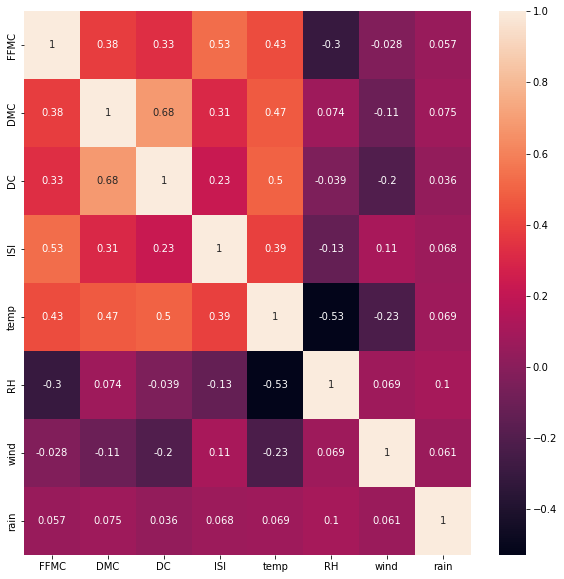

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True)


In [12]:
data=df[df.columns[0:2]]
data
df1=df[df.columns[2:10]]
df1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


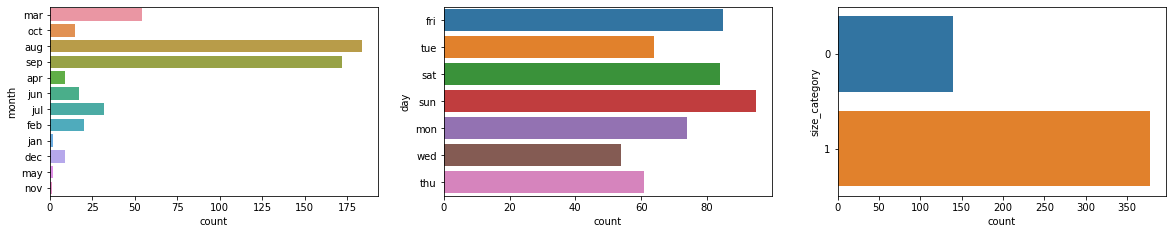

In [13]:
plt.subplots(figsize=(20,16))
[plt.subplot(4,3,1), sns.countplot(data=data, y='month')];

[plt.subplot(4,3,2), sns.countplot(data=data, y='day')]

[plt.subplot(4,3,3), sns.countplot(data=df, y='size_category')];

[<AxesSubplot:xlabel='area'>, <AxesSubplot:xlabel='area'>]

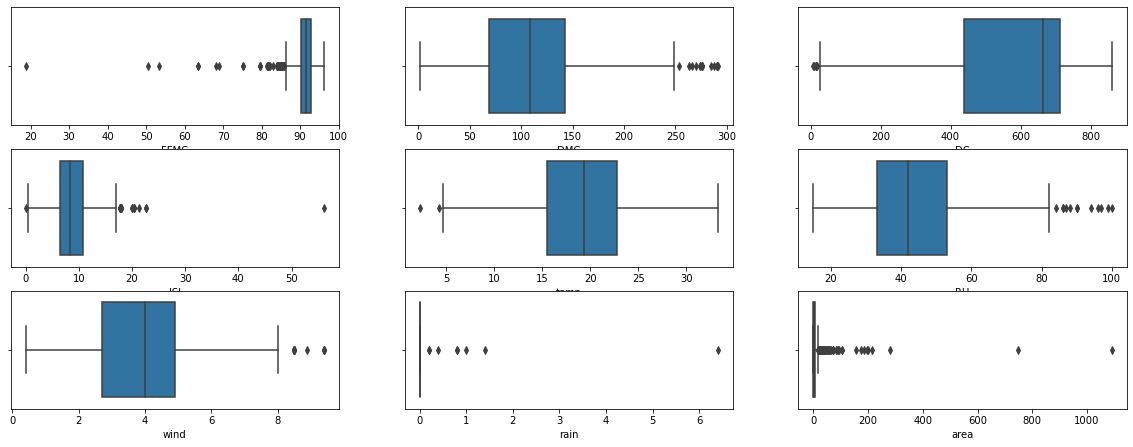

In [14]:
plt.figure(figsize=(20,10))

[plt.subplot(4,3,1), sns.boxplot(x=df["FFMC"])];

[plt.subplot(4,3,2), sns.boxplot(x=df["DMC"])];

[plt.subplot(4,3,3), sns.boxplot(x=df["DC"])];

[plt.subplot(4,3,4), sns.boxplot(x=df["ISI"])];

[plt.subplot(4,3,5), sns.boxplot(x=df["temp"])];

[plt.subplot(4,3,6), sns.boxplot(x=df["RH"])];

[plt.subplot(4,3,7), sns.boxplot(x=df["wind"])];

[plt.subplot(4,3,8), sns.boxplot(x=df["rain"])];

[plt.subplot(4,3,9), sns.boxplot(x=df["area"])]

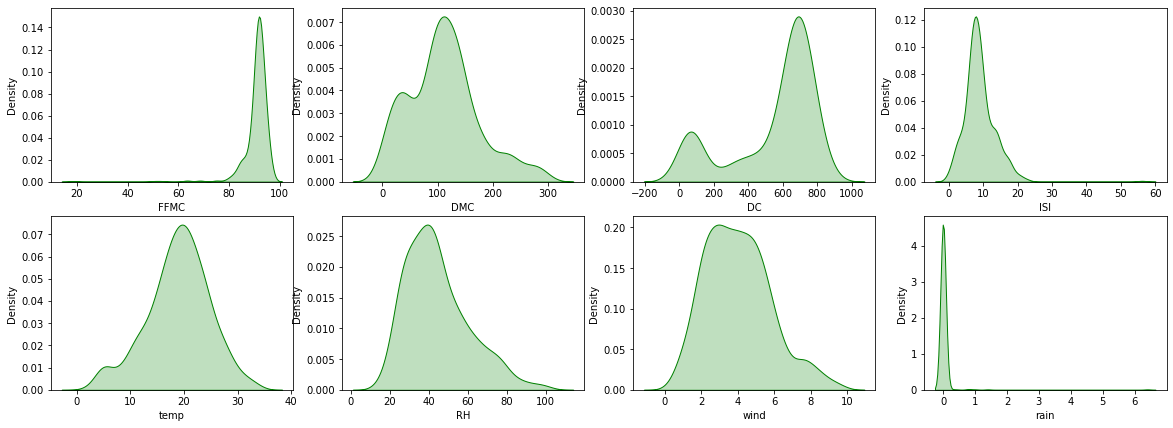

In [15]:
no_columns = df1.select_dtypes(exclude='object').columns.tolist()

plt.figure(figsize=(20,30))
for i,column in enumerate(no_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df1[column],color='g',shade=True)


In [16]:
## now separating the dataset in to x and y

In [17]:
x=df.iloc[:,2:10]
y=df.iloc[:,-1]

In [18]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [19]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [21]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((361, 8), (156, 8), (361,), (156,))

# Grid Search CV

# 1.using kernel=rbf

In [22]:
clf=SVC()

parameters={'kernel':[ 'rbf'],
           'gamma':[70, 50, 5, 0.5, 0.1, 0.01, 0.0001],
           'C':[60, 15,10, 6, 5, 0.1, 0.001, 0.0001 ]}


gsv=GridSearchCV(clf , param_grid=parameters , cv=10)

gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [60, 15, 10, 6, 5, 0.1, 0.001, 0.0001],
                         'gamma': [70, 50, 5, 0.5, 0.1, 0.01, 0.0001],
                         'kernel': ['rbf']})

In [23]:
gsv.best_params_

{'C': 0.1, 'gamma': 70, 'kernel': 'rbf'}

In [24]:
gsv.best_score_

0.7063813813813814

In [25]:
model=SVC(C=60,gamma=70)
model.fit(x_train,y_train)

SVC(C=60, gamma=70)

In [26]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1])

In [27]:
acc=accuracy_score(y_test,y_pred) * 100
print(acc)

77.56410256410257


In [28]:
confusion_matrix(y_test, y_pred)

array([[  1,  32],
       [  3, 120]], dtype=int64)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.03      0.05        33
           1       0.79      0.98      0.87       123

    accuracy                           0.78       156
   macro avg       0.52      0.50      0.46       156
weighted avg       0.68      0.78      0.70       156

